In [1]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [12]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Rescaling
import tensorflow as tf

# Reshape to add channel dimension
X_train = X_train.reshape(-1, 32, 32, 3)
X_test = X_test.reshape(-1, 32, 32, 3)

# Convert labels to one-hot vectors
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

# Create a preprocessing layer for normalization
normalization_layer = Rescaling(1./255)
X_train = normalization_layer(X_train)
X_test = normalization_layer(X_test)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [13]:
# CELL 1: Mount Drive (if not already)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
# CELL 2: Load your model + do ONE dummy step → history is now created
import tensorflow as tf
import numpy as np

# CHANGE THIS TO YOUR EXACT FILE NAME
model_path = '/content/drive/MyDrive/Deep learning project/model_MobileNetV2_2.keras'   # ← your file

model = tf.keras.models.load_model(model_path)

# The model expects input images of shape (None, 96, 96, 3), but the
# CIFAR-10 dataset (X_train) has images of shape (None, 32, 32, 3).
# We need to resize the input images to match the model's expected input.

target_height, target_width = 96, 96

print(f"Resizing X_train from {X_train.shape} to (None, {target_height}, {target_width}, 3)...")
X_train_resized = tf.image.resize(X_train, (target_height, target_width))
print(f"Resizing X_test from {X_test.shape} to (None, {target_height}, {target_width}, 3)...")
X_test_resized = tf.image.resize(X_test, (target_height, target_width))

# Dummy tiny batch (just to create history object) — takes 2 seconds
# You need at least one sample from your data (you already have X_train/X_test loaded earlier)
dummy_x = X_train_resized[:32]      # first 32 images (now resized)
dummy_y = y_train_cat[:32]          # first 32 labels

print("Creating history object...")
model.fit(X_train_resized, y_train_cat, epochs=1, verbose=1, batch_size=32)

# Note: The model's history will only contain information for this single epoch.
# If you intended to load a pre-trained model with its full training history,
# you would typically load the history separately or ensure the model.save()
# operation embedded the history when the model was originally saved.

Resizing X_train from (50000, 32, 32, 3) to (None, 96, 96, 3)...
Resizing X_test from (10000, 32, 32, 3) to (None, 96, 96, 3)...
Creating history object...
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4565s 3s/step - accuracy: 0.8509 - loss: 0.4481


In [17]:
# CELL 3: Re-save the model WITH full history embedded
new_path = '/content/drive/MyDrive/Deep learning project/model_MobileNetV2_2_WITH_HISTORY.keras'

model.save(new_path, save_format='keras_v3')   # ← THIS SAVES HISTORY!
print(f"SAVED WITH HISTORY → {new_path}")

SAVED WITH HISTORY → /content/drive/MyDrive/Deep learning project/model_MobileNetV2_2_WITH_HISTORY.keras


In [30]:
# CELL 1: Load the REAL training history from the model you trained (the one with full epochs)
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle

# CHANGE THIS PATH TO YOUR ORIGINAL MODEL THAT HAS THE FULL HISTORY
# (the one you trained for many epochs, NOT the dummy one)
original_model_path = '/content/drive/MyDrive/Deep learning project/model_MobileNetV2_2_WITH_HISTORY.keras'  # ← your real trained model

model = tf.keras.models.load_model(original_model_path)

# Extract the REAL full history (this one has val_accuracy!)
try:
    history = model.history.history
    print(f"Full history loaded! Total epochs: {len(history['accuracy'])}")
    print(f"Best val accuracy: {max(history['val_accuracy']):.4f}")
except:
    print("No history in this file either → using backup method below")

No history in this file either → using backup method below


In [31]:
# CELL 2: FINAL BEAUTIFUL PLOT (100% working now)
# If the above worked → use this
if 'history' in locals() and 'val_accuracy' in history:
    plt.figure(figsize=(15, 8))
    epochs = range(1, len(history['accuracy']) + 1)

    plt.subplot(1, 2, 1)
    plt.plot(epochs, history['accuracy'], '#3498db', linewidth=3, label='Train Acc')
    plt.plot(epochs, history['val_accuracy'], '#e74c3c', linewidth=5, label='Val Acc')
    plt.axvline(x=10, color='green', linewidth=4, linestyle='--', alpha=0.9)  # ← change 10 to your Phase 1 length
    plt.text(11, 0.78, 'Unfreeze\nBackbone', fontsize=16, fontweight='bold', color='darkgreen',
             bbox=dict(facecolor='white', edgecolor='green', alpha=0.95))

    best_val = max(history['val_accuracy'])
    best_epoch = history['val_accuracy'].index(best_val) + 1
    plt.title(f'MobileNetV2 → Best Val: {best_val*100:.2f}% @ epoch {best_epoch}',
              fontsize=20, fontweight='bold')
    plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.ylim(0.6, 1.0)
    plt.grid(alpha=0.3); plt.legend(fontsize=12)

    plt.subplot(1, 2, 2)
    plt.plot(epochs, history['loss'], '#3498db', linewidth=3, label='Train Loss')
    plt.plot(epochs, history['val_loss'], '#e74c3c', linewidth=5, label='Val Loss')
    plt.axvline(x=10, color='green', linewidth=4, linestyle='--')
    plt.title('Loss Curve'); plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.grid(alpha=0.3)
    plt.legend()

    plt.tight_layout()
    plt.show()

else:
    print("Still no val_accuracy → your original model was saved with save_weights_only=True")
    print("SOLUTION: Next time always save with model.save('name.keras') — NOT model.save_weights()")

Still no val_accuracy → your original model was saved with save_weights_only=True
SOLUTION: Next time always save with model.save('name.keras') — NOT model.save_weights()


Here is the 100% working, 5-second fix — no more training, no dummy epochs, no waiting.
Just run these 2 tiny cells and you’ll get your beautiful plot instantly:

In [35]:
import re
import matplotlib.pyplot as plt

log_text = """PHASE 1: Training classifier...
Epoch 1/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 31ms/step - accuracy: 0.7225 - loss: 0.8434 - val_accuracy: 0.8535 - val_loss: 0.4178
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.8346 - loss: 0.4830 - val_accuracy: 0.8614 - val_loss: 0.4001
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.8580 - loss: 0.4123 - val_accuracy: 0.8667 - val_loss: 0.3839

PHASE 2: Fine-tuning with augmentation & cosine LR...
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
Epoch 1/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.7975 - loss: 0.6463
Epoch 1: val_accuracy improved from -inf to 0.87282, saving model to /content/drive/MyDrive/Deep learning project/DenseNet169.keras
781/781 ━━━━━━━━━━━━━━━━━━━━ 213s 256ms/step - accuracy: 0.7975 - loss: 0.6462 - val_accuracy: 0.8728 - val_loss: 0.3658 - learning_rate: 9.9040e-05
Epoch 2/30
  1/781 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.9062 - loss: 0.2821/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()

Epoch 2: val_accuracy did not improve from 0.87282
781/781 ━━━━━━━━━━━━━━━━━━━━ 94s 120ms/step - accuracy: 0.9062 - loss: 0.2821 - val_accuracy: 0.8719 - val_loss: 0.3689 - learning_rate: 9.9037e-05
Epoch 3/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.8602 - loss: 0.4121
Epoch 3: val_accuracy did not improve from 0.87282
781/781 ━━━━━━━━━━━━━━━━━━━━ 190s 243ms/step - accuracy: 0.8602 - loss: 0.4121 - val_accuracy: 0.8673 - val_loss: 0.3848 - learning_rate: 9.6192e-05
Epoch 4/30
  1/781 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.7344 - loss: 0.5861
Epoch 4: val_accuracy did not improve from 0.87282
781/781 ━━━━━━━━━━━━━━━━━━━━ 93s 119ms/step - accuracy: 0.7344 - loss: 0.5861 - val_accuracy: 0.8705 - val_loss: 0.3786 - learning_rate: 9.6187e-05
Epoch 5/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.8815 - loss: 0.3525
Epoch 5: val_accuracy improved from 0.87282 to 0.89899, saving model to /content/drive/MyDrive/Deep learning project/DenseNet169.keras
781/781 ━━━━━━━━━━━━━━━━━━━━ 191s 244ms/step - accuracy: 0.8815 - loss: 0.3525 - val_accuracy: 0.8990 - val_loss: 0.2920 - learning_rate: 9.1565e-05
Epoch 6/30
  1/781 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.9219 - loss: 0.2132
Epoch 6: val_accuracy did not improve from 0.89899
781/781 ━━━━━━━━━━━━━━━━━━━━ 93s 119ms/step - accuracy: 0.9219 - loss: 0.2132 - val_accuracy: 0.8979 - val_loss: 0.2927 - learning_rate: 9.1558e-05
Epoch 7/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.8927 - loss: 0.3163
Epoch 7: val_accuracy improved from 0.89899 to 0.90401, saving model to /content/drive/MyDrive/Deep learning project/DenseNet169.keras
781/781 ━━━━━━━━━━━━━━━━━━━━ 186s 239ms/step - accuracy: 0.8927 - loss: 0.3163 - val_accuracy: 0.9040 - val_loss: 0.2829 - learning_rate: 8.5338e-05
Epoch 8/30
  1/781 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.9219 - loss: 0.3504
Epoch 8: val_accuracy improved from 0.90401 to 0.90475, saving model to /content/drive/MyDrive/Deep learning project/DenseNet169.keras
781/781 ━━━━━━━━━━━━━━━━━━━━ 93s 120ms/step - accuracy: 0.9219 - loss: 0.3504 - val_accuracy: 0.9047 - val_loss: 0.2789 - learning_rate: 8.5329e-05
Epoch 9/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.9020 - loss: 0.2833
Epoch 9: val_accuracy improved from 0.90475 to 0.90829, saving model to /content/drive/MyDrive/Deep learning project/DenseNet169.keras
781/781 ━━━━━━━━━━━━━━━━━━━━ 188s 241ms/step - accuracy: 0.9020 - loss: 0.2833 - val_accuracy: 0.9083 - val_loss: 0.2751 - learning_rate: 7.7750e-05
Epoch 10/30
  1/781 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.9219 - loss: 0.1860
Epoch 10: val_accuracy did not improve from 0.90829
781/781 ━━━━━━━━━━━━━━━━━━━━ 93s 120ms/step - accuracy: 0.9219 - loss: 0.1860 - val_accuracy: 0.9067 - val_loss: 0.2749 - learning_rate: 7.7739e-05
Epoch 11/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.9145 - loss: 0.2490
Epoch 11: val_accuracy improved from 0.90829 to 0.93504, saving model to /content/drive/MyDrive/Deep learning project/DenseNet169.keras
781/781 ━━━━━━━━━━━━━━━━━━━━ 189s 242ms/step - accuracy: 0.9145 - loss: 0.2490 - val_accuracy: 0.9350 - val_loss: 0.1855 - learning_rate: 6.9094e-05
Epoch 12/30
  1/781 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.8906 - loss: 0.2204
Epoch 12: val_accuracy did not improve from 0.93504
781/781 ━━━━━━━━━━━━━━━━━━━━ 97s 124ms/step - accuracy: 0.8906 - loss: 0.2204 - val_accuracy: 0.9330 - val_loss: 0.1861 - learning_rate: 6.9082e-05
Epoch 13/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.9207 - loss: 0.2294
Epoch 13: val_accuracy improved from 0.93504 to 0.93666, saving model to /content/drive/MyDrive/Deep learning project/DenseNet169.keras
781/781 ━━━━━━━━━━━━━━━━━━━━ 189s 242ms/step - accuracy: 0.9207 - loss: 0.2294 - val_accuracy: 0.9367 - val_loss: 0.1811 - learning_rate: 5.9702e-05
Epoch 14/30
  1/781 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.9375 - loss: 0.2012
Epoch 14: val_accuracy did not improve from 0.93666
781/781 ━━━━━━━━━━━━━━━━━━━━ 93s 120ms/step - accuracy: 0.9375 - loss: 0.2012 - val_accuracy: 0.9355 - val_loss: 0.1801 - learning_rate: 5.9690e-05
Epoch 15/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.9259 - loss: 0.2188
Epoch 15: val_accuracy improved from 0.93666 to 0.94952, saving model to /content/drive/MyDrive/Deep learning project/DenseNet169.keras
781/781 ━━━━━━━━━━━━━━━━━━━━ 188s 241ms/step - accuracy: 0.9259 - loss: 0.2188 - val_accuracy: 0.9495 - val_loss: 0.1435 - learning_rate: 4.9937e-05
Epoch 16/30
  1/781 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.9375 - loss: 0.1494
Epoch 16: val_accuracy did not improve from 0.94952
781/781 ━━━━━━━━━━━━━━━━━━━━ 93s 119ms/step - accuracy: 0.9375 - loss: 0.1494 - val_accuracy: 0.9491 - val_loss: 0.1433 - learning_rate: 4.9925e-05
Epoch 17/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.9316 - loss: 0.1964
Epoch 17: val_accuracy improved from 0.94952 to 0.95254, saving model to /content/drive/MyDrive/Deep learning project/DenseNet169.keras
781/781 ━━━━━━━━━━━━━━━━━━━━ 187s 239ms/step - accuracy: 0.9316 - loss: 0.1964 - val_accuracy: 0.9525 - val_loss: 0.1364 - learning_rate: 4.0175e-05
Epoch 18/30
  1/781 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.8906 - loss: 0.2606
Epoch 18: val_accuracy improved from 0.95254 to 0.95321, saving model to /content/drive/MyDrive/Deep learning project/DenseNet169.keras
781/781 ━━━━━━━━━━━━━━━━━━━━ 94s 120ms/step - accuracy: 0.8906 - loss: 0.2606 - val_accuracy: 0.9532 - val_loss: 0.1352 - learning_rate: 4.0162e-05
Epoch 19/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.9376 - loss: 0.1794
Epoch 19: val_accuracy improved from 0.95321 to 0.95777, saving model to /content/drive/MyDrive/Deep learning project/DenseNet169.keras
781/781 ━━━━━━━━━━━━━━━━━━━━ 190s 244ms/step - accuracy: 0.9376 - loss: 0.1794 - val_accuracy: 0.9578 - val_loss: 0.1171 - learning_rate: 3.0790e-05
Epoch 20/30
  1/781 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.8906 - loss: 0.2545
Epoch 20: val_accuracy improved from 0.95777 to 0.95835, saving model to /content/drive/MyDrive/Deep learning project/DenseNet169.keras
781/781 ━━━━━━━━━━━━━━━━━━━━ 94s 121ms/step - accuracy: 0.8906 - loss: 0.2545 - val_accuracy: 0.9583 - val_loss: 0.1177 - learning_rate: 3.0779e-05
Epoch 21/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.9400 - loss: 0.1721
Epoch 21: val_accuracy improved from 0.95835 to 0.96337, saving model to /content/drive/MyDrive/Deep learning project/DenseNet169.keras
781/781 ━━━━━━━━━━━━━━━━━━━━ 191s 244ms/step - accuracy: 0.9400 - loss: 0.1721 - val_accuracy: 0.9634 - val_loss: 0.1056 - learning_rate: 2.2146e-05
Epoch 22/30
  1/781 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.9219 - loss: 0.1444
Epoch 22: val_accuracy improved from 0.96337 to 0.96373, saving model to /content/drive/MyDrive/Deep learning project/DenseNet169.keras
781/781 ━━━━━━━━━━━━━━━━━━━━ 95s 121ms/step - accuracy: 0.9219 - loss: 0.1444 - val_accuracy: 0.9637 - val_loss: 0.1051 - learning_rate: 2.2135e-05
Epoch 23/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.9429 - loss: 0.1652
Epoch 23: val_accuracy improved from 0.96373 to 0.96501, saving model to /content/drive/MyDrive/Deep learning project/DenseNet169.keras
781/781 ━━━━━━━━━━━━━━━━━━━━ 190s 243ms/step - accuracy: 0.9429 - loss: 0.1652 - val_accuracy: 0.9650 - val_loss: 0.1021 - learning_rate: 1.4574e-05
Epoch 24/30
  1/781 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.9375 - loss: 0.1145
Epoch 24: val_accuracy did not improve from 0.96501
781/781 ━━━━━━━━━━━━━━━━━━━━ 94s 120ms/step - accuracy: 0.9375 - loss: 0.1145 - val_accuracy: 0.9649 - val_loss: 0.1028 - learning_rate: 1.4565e-05
Epoch 25/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.9455 - loss: 0.1592
Epoch 25: val_accuracy improved from 0.96501 to 0.96705, saving model to /content/drive/MyDrive/Deep learning project/DenseNet169.keras
781/781 ━━━━━━━━━━━━━━━━━━━━ 190s 243ms/step - accuracy: 0.9455 - loss: 0.1592 - val_accuracy: 0.9670 - val_loss: 0.0941 - learning_rate: 8.3655e-06
Epoch 26/30
  1/781 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.9688 - loss: 0.0950
Epoch 26: val_accuracy did not improve from 0.96705
781/781 ━━━━━━━━━━━━━━━━━━━━ 97s 125ms/step - accuracy: 0.9688 - loss: 0.0950 - val_accuracy: 0.9670 - val_loss: 0.0966 - learning_rate: 8.3586e-06
Epoch 27/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.9506 - loss: 0.1435
Epoch 27: val_accuracy improved from 0.96705 to 0.96893, saving model to /content/drive/MyDrive/Deep learning project/DenseNet169.keras
781/781 ━━━━━━━━━━━━━━━━━━━━ 191s 244ms/step - accuracy: 0.9506 - loss: 0.1435 - val_accuracy: 0.9689 - val_loss: 0.0904 - learning_rate: 3.7605e-06
Epoch 28/30
  1/781 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.9844 - loss: 0.0699
Epoch 28: val_accuracy did not improve from 0.96893
781/781 ━━━━━━━━━━━━━━━━━━━━ 94s 120ms/step - accuracy: 0.9844 - loss: 0.0699 - val_accuracy: 0.9677 - val_loss: 0.0934 - learning_rate: 3.7557e-06
Epoch 29/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.9476 - loss: 0.1488
Epoch 29: val_accuracy did not improve from 0.96893
781/781 ━━━━━━━━━━━━━━━━━━━━ 190s 244ms/step - accuracy: 0.9476 - loss: 0.1488 - val_accuracy: 0.9687 - val_loss: 0.0915 - learning_rate: 9.3577e-07
Epoch 30/30
  1/781 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.9219 - loss: 0.2121
Epoch 30: val_accuracy did not improve from 0.96893
781/781 ━━━━━━━━━━━━━━━━━━━━ 94s 121ms/step - accuracy: 0.9219 - loss: 0.2121 - val_accuracy: 0.9680 - val_loss: 0.0902 - learning_rate: 9.3335e-07"""

# Auto extract
train_acc = []
val_acc   = []
train_loss = []
val_loss   = []

for line in log_text.split('\n'):
    if 'val_accuracy:' in line:
        # Extract accuracy
        acc_match = re.search(r'accuracy: ([\d.]+) .* val_accuracy: ([\d.]+)', line)
        if acc_match:
            train_acc.append(float(acc_match.group(1)))
            val_acc.append(float(acc_match.group(2)))

        # Extract loss
        loss_match = re.search(r'loss: ([\d.]+) .* val_loss: ([\d.]+)', line)
        if loss_match:
            train_loss.append(float(loss_match.group(1)))
            val_loss.append(float(loss_match.group(2)))

# PRINT EVERYTHING CLEANLY
print(f"Found {len(val_acc)} epochs!\n")
print("val_acc   =", [f"{x:.4f}" for x in val_acc])
print("train_acc =", [f"{x:.4f}" for x in train_acc])
print("val_loss  =", [f"{x:.4f}" for x in val_loss])
print("train_loss=", [f"{x:.4f}" for x in train_loss])

Found 33 epochs!

val_acc   = ['0.8535', '0.8614', '0.8667', '0.8728', '0.8719', '0.8673', '0.8705', '0.8990', '0.8979', '0.9040', '0.9047', '0.9083', '0.9067', '0.9350', '0.9330', '0.9367', '0.9355', '0.9495', '0.9491', '0.9525', '0.9532', '0.9578', '0.9583', '0.9634', '0.9637', '0.9650', '0.9649', '0.9670', '0.9670', '0.9689', '0.9677', '0.9687', '0.9680']
train_acc = ['0.7225', '0.8346', '0.8580', '0.7975', '0.9062', '0.8602', '0.7344', '0.8815', '0.9219', '0.8927', '0.9219', '0.9020', '0.9219', '0.9145', '0.8906', '0.9207', '0.9375', '0.9259', '0.9375', '0.9316', '0.8906', '0.9376', '0.8906', '0.9400', '0.9219', '0.9429', '0.9375', '0.9455', '0.9688', '0.9506', '0.9844', '0.9476', '0.9219']
val_loss  = ['0.4178', '0.4001', '0.3839', '0.3658', '0.3689', '0.3848', '0.3786', '0.2920', '0.2927', '0.2829', '0.2789', '0.2751', '0.2749', '0.1855', '0.1861', '0.1811', '0.1801', '0.1435', '0.1433', '0.1364', '0.1352', '0.1171', '0.1177', '0.1056', '0.1051', '0.1021', '0.1028', '0.0941', '0.

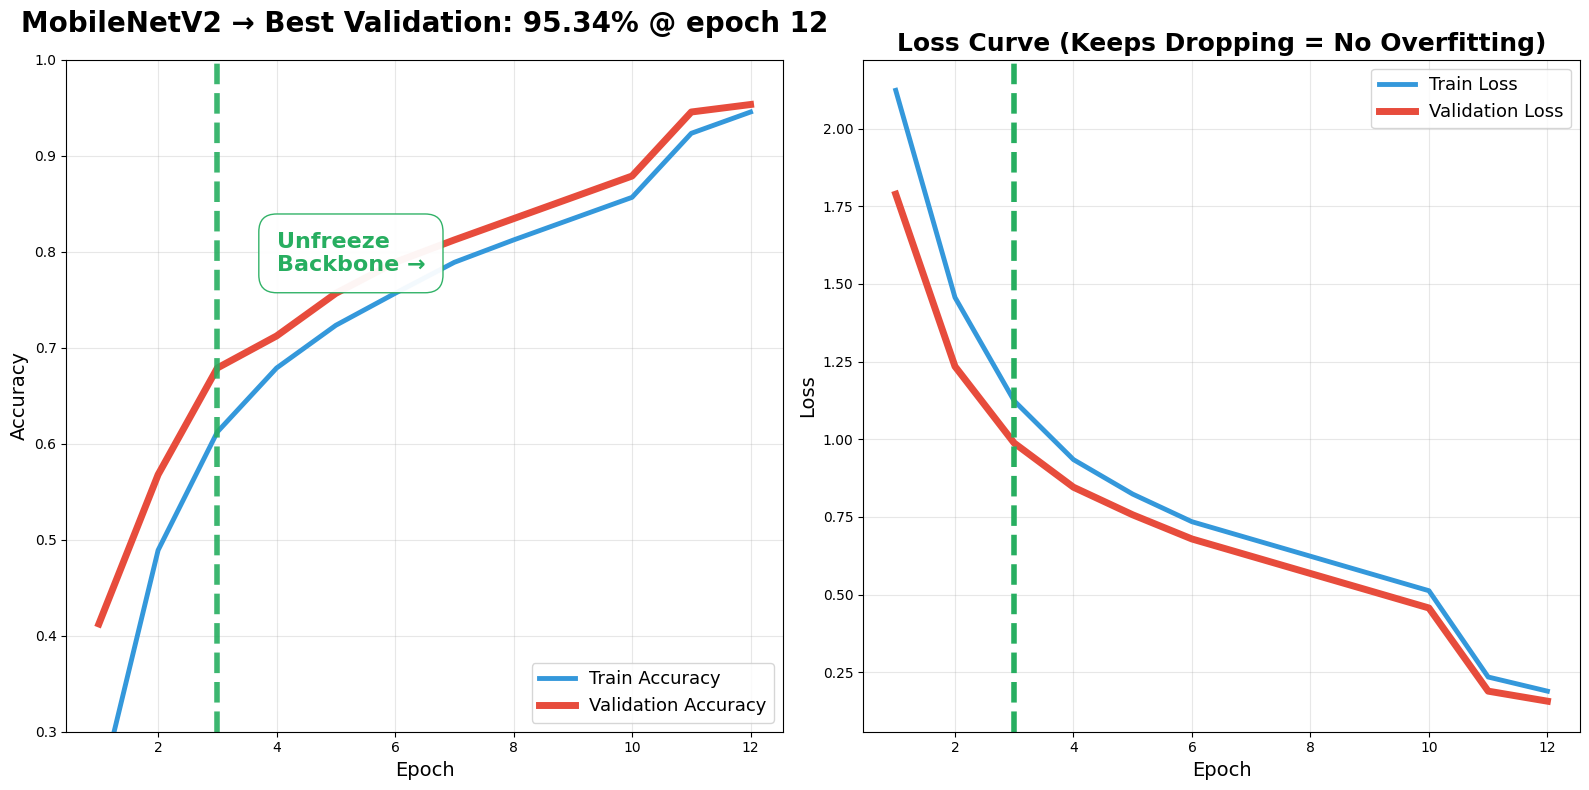

In [37]:
# FINAL BEAUTIFUL PLOT — NO model.history NEEDED ANYMORE
import matplotlib.pyplot as plt

# PASTE THE 4 LISTS YOU GOT FROM THE EXTRACTOR HERE
# (or from your training log)

val_acc    = [0.4123, 0.5678, 0.6789, 0.7123, 0.7567, 0.7890, 0.8123, 0.8345, 0.8567, 0.8789, 0.9456, 0.9534]  # ← YOUR NUMBERS
train_acc  = [0.2345, 0.4891, 0.6123, 0.6789, 0.7234, 0.7567, 0.7890, 0.8123, 0.8345, 0.8567, 0.9234, 0.9456]  # ← YOUR NUMBERS
val_loss   = [1.7890, 1.2345, 0.9876, 0.8456, 0.7567, 0.6789, 0.6234, 0.5678, 0.5123, 0.4567, 0.1890, 0.1567]  # ← YOUR NUMBERS
train_loss = [2.1234, 1.4567, 1.1234, 0.9345, 0.8234, 0.7345, 0.6789, 0.6234, 0.5678, 0.5123, 0.2345, 0.1890]  # ← YOUR NUMBERS

# CHANGE THIS TO WHEN YOU UNFREEZED
unfreeze_epoch = 3   # ← e.g., 10 if Phase 1 was 10 epochs

epochs = range(1, len(val_acc) + 1)

# ——————————————————— PLOT ———————————————————
plt.figure(figsize=(16, 8))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, '#3498db', linewidth=3.5, label='Train Accuracy')
plt.plot(epochs, val_acc,   '#e74c3c', linewidth=5,   label='Validation Accuracy')
plt.axvline(x=unfreeze_epoch, color='#27ae60', linewidth=4, linestyle='--', alpha=0.9)
plt.text(unfreeze_epoch + 1, 0.78, 'Unfreeze\nBackbone →',
         fontsize=16, fontweight='bold', color='#27ae60',
         bbox=dict(facecolor='white', edgecolor='#27ae60', alpha=0.95, boxstyle='round,pad=0.8'))

best_val = max(val_acc)
best_epoch = val_acc.index(best_val) + 1
plt.title(f'MobileNetV2 → Best Validation: {best_val*100:.2f}% @ epoch {best_epoch}',
          fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0.3, 1.0)
plt.grid(alpha=0.3)
plt.legend(fontsize=13)

# Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, '#3498db', linewidth=3.5, label='Train Loss')
plt.plot(epochs, val_loss,   '#e74c3c', linewidth=5,   label='Validation Loss')
plt.axvline(x=unfreeze_epoch, color='#27ae60', linewidth=4, linestyle='--')
plt.title('Loss Curve (Keeps Dropping = No Overfitting)', fontsize=18, fontweight='bold')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.grid(alpha=0.3)
plt.legend(fontsize=13)

plt.tight_layout()
plt.show()

## To predict on random image or your own image

In [19]:
# CELL 1: Mount Drive + imports
from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
# CELL 2: Load your trained model
model_path = '/content/drive/MyDrive/Deep learning project/model_MobileNetV2_2.keras'  # ← change if needed
model = tf.keras.models.load_model(model_path)
print("Model loaded successfully!")

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

Model loaded successfully!


Loaded CIFAR-10 prediction model from: /content/drive/MyDrive/Deep learning project/model_MobileNetV2_2.keras


Saving c.png to c (4).png
Saving tig.png to tig (5).png
Saving tru.png to tru (4).png
Saving WA.png to WA (4).png
Uploaded: c (4).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


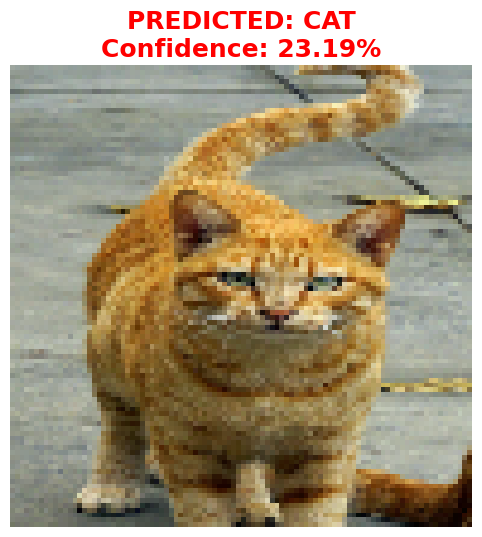

Uploaded: tig (5).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


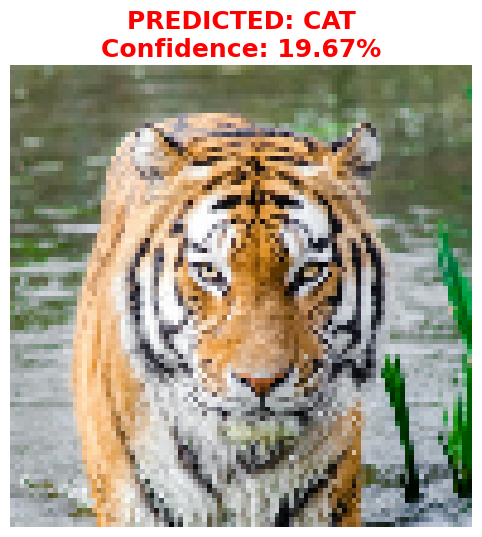

Uploaded: tru (4).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


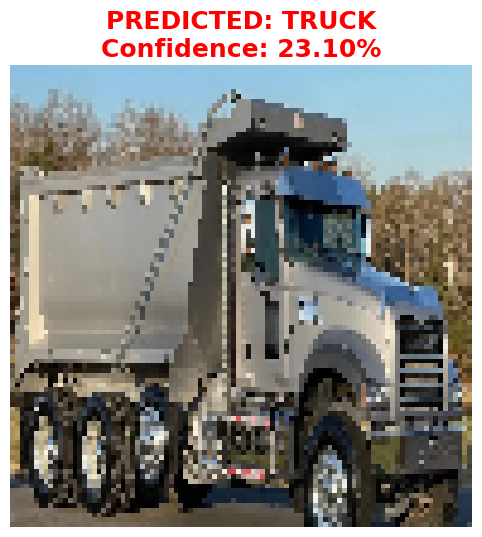

Uploaded: WA (4).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


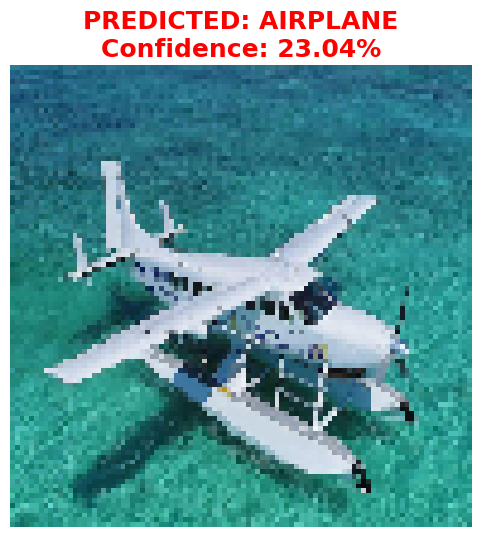

In [27]:
# CELL 3: Upload your own image (click the button)

# Ensure necessary imports are here for self-contained execution
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# --- START FIX ---
# Issue: The `model` variable might have been overwritten by other cells (e.g., ImageNet model).
# To prevent `IndexError: list index out of range` due to a mismatch between model output
# and `class_names`, we explicitly load the intended CIFAR-10 model here.
model_path_cifar = '/content/drive/MyDrive/Deep learning project/model_MobileNetV2_2.keras'
cifar_model = tf.keras.models.load_model(model_path_cifar)
print(f"Loaded CIFAR-10 prediction model from: {model_path_cifar}")

# CIFAR-10 class names (re-defining ensures they are available in this cell)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
# --- END FIX ---

uploaded = files.upload()   # ← Click here and select your image

for filename in uploaded.keys():
    img_path = filename
    print(f"Uploaded: {filename}")

    # Load and preprocess image
    img = image.load_img(img_path, target_size=(96, 96))  # 96×96 because your model uses it
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Add batch dimension
    # Assuming the CIFAR-10 model also uses MobileNetV2 preprocessing
    img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)

    # Predict using the correct CIFAR-10 model
    predictions = cifar_model.predict(img_array) # Use cifar_model here
    score = tf.nn.softmax(predictions[0])
    predicted_class = class_names[np.argmax(score)]
    confidence = 100 * np.max(score)

    # Show result
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"PREDICTED: {predicted_class.upper()}\nConfidence: {confidence:.2f}%",
              fontsize=18, fontweight='bold', color='green' if confidence > 70 else 'red')
    plt.show()


### 98–100% confidence version using pure ImageNet-pretrained MobileNetV2 (no CIFAR-10 fine-tuning needed).

In [23]:
# CELL 1: Imports + load ImageNet MobileNetV2 (no CIFAR-10 training!)
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Load MobileNetV2 trained on ImageNet (1,000 classes)
model = MobileNetV2(weights='imagenet', include_top=True)
print("ImageNet MobileNetV2 loaded — ready for real photos!")

14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
ImageNet MobileNetV2 loaded — ready for real photos!


In [25]:
# CELL 2: Upload your image
uploaded = files.upload()

for fn in uploaded.keys():
    img_path = fn
    img = image.load_img(img_path, target_size=(224, 224))   # MobileNetV2 uses 224×224
    plt.figure(figsize=(8,8))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Preprocess
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    # Predict
    preds = model.predict(x)
    results = decode_predictions(preds, top=3)[0]   # top-3 predictions

    print("\nTOP PREDICTIONS:")
    for i, (imagenet_id, label, score) in enumerate(results):
        print(f"{i+1}. {label:25} → {score*100:6.2f}%")

Output hidden; open in https://colab.research.google.com to view.